In [31]:
#Import all the needed packages
import yfinance as yf
from datetime import date
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import talib
from talib import abstract
import mplfinance as mpf

#Import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
#Getting data from yahoo
from pandas_datareader import data as pdr
yf.pdr_override()
df=pdr.get_data_yahoo(tickers="AAPL,MCD,TSLA,FB", start="2019-11-23", end=date.today(),group_by = 'ticker')
df

[*********************100%***********************]  4 of 4 completed


FB                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2019-11-22  198.380005  199.300003  197.619995  198.820007  198.820007   
2019-11-25  199.520004  200.970001  199.250000  199.789993  199.789993   
2019-11-26  200.000000  200.149994  198.039993  198.970001  198.970001   
2019-11-27  199.899994  203.139999  199.419998  202.000000  202.000000   
2019-11-29  201.600006  203.800003  201.210007  201.639999  201.639999   
...                ...         ...         ...         ...         ...   
2022-05-16  197.050003  205.369995  195.929993  200.039993  200.039993   
2022-05-17  202.119995  205.460007  198.360001  202.619995  202.619995   
2022-05-18  200.000000  201.000000  191.630005  192.240005  192.240005   
2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993   
2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   

                            AAPL                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2019-11-22   9959800   65.647499   65.794998   65.209999   65.445000  ...   
2019-11-25  15272300   65.677498   66.610001   65.629997   66.592499  ...   
2019-11-26  11735500   66.735001   66.790001   65.625000   66.072502  ...   
2019-11-27  12736600   66.394997   66.995003   66.327499   66.959999  ...   
2019-11-29   7985200   66.650002   67.000000   66.474998   66.812500  ...   
...              ...         ...         ...         ...         ...  ...   
2022-05-16  27112600  145.550003  147.520004  144.179993  145.539993  ...   
2022-05-17  24872700  148.860001  149.770004  146.679993  149.240005  ...   
2022-05-18  23960000  146.850006  147.360001  139.899994  140.820007  ...   
2022-05-19  24446900  139.880005  141.660004  136.600006  137.350006  ...   
2022-05-20  31437700  139.089996  140.699997  132.610001  137.589996  ...   

                   MCD                                         TSLA  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2019-11-22  192.149994  193.139999  182.035004  2417700   68.031998   
2019-11-25  191.600006  191.889999  180.856873  3999600   68.863998   
2019-11-26  191.949997  194.009995  182.854996  3877200   67.054001   
2019-11-27  193.919998  196.300003  185.013290  4133000   66.223999   
2019-11-29  194.270004  194.479996  184.472610  2815500   66.222000   
...                ...         ...         ...      ...         ...   
2022-05-16  240.729996  244.039993  244.039993  2147100  767.159973   
2022-05-17  239.460007  241.630005  241.630005  3204900  747.359985   
2022-05-18  230.369995  231.050003  231.050003  3946100  744.520020   
2022-05-19  228.339996  229.000000  229.000000  3518300  707.000000   
2022-05-20  228.589996  233.910004  233.910004  3207900  713.989990   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2019-11-22   68.199997   66.000000   66.608002   66.608002  84353000  
2019-11-25   68.914001   66.891998   67.267998   67.267998  61697500  
2019-11-26   67.099998   65.419998   65.783997   65.783997  39737000  
2019-11-27   66.786003   65.713997   66.258003   66.258003  27778000  
2019-11-29   66.251999   65.500000   65.987999   65.987999  12328000  
...                ...         ...         ...         ...       ...  
2022-05-16  769.760010  719.090027  724.369995  724.369995  28699500  
2022-05-17  764.479980  728.849976  761.609985  761.609985  26745400  
2022-05-18  760.500000  700.809998  709.809998  709.809998  29270600  
2022-05-19  734.000000  694.109985  709.419983  709.41998

In [33]:
#Data Preprocessing

#Check for the NA Value
df.isnull().values.any()

#Fill with the previous value
df.fillna(method='ffill')

FB                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2019-11-22  198.380005  199.300003  197.619995  198.820007  198.820007   
2019-11-25  199.520004  200.970001  199.250000  199.789993  199.789993   
2019-11-26  200.000000  200.149994  198.039993  198.970001  198.970001   
2019-11-27  199.899994  203.139999  199.419998  202.000000  202.000000   
2019-11-29  201.600006  203.800003  201.210007  201.639999  201.639999   
...                ...         ...         ...         ...         ...   
2022-05-16  197.050003  205.369995  195.929993  200.039993  200.039993   
2022-05-17  202.119995  205.460007  198.360001  202.619995  202.619995   
2022-05-18  200.000000  201.000000  191.630005  192.240005  192.240005   
2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993   
2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   

                            AAPL                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2019-11-22   9959800   65.647499   65.794998   65.209999   65.445000  ...   
2019-11-25  15272300   65.677498   66.610001   65.629997   66.592499  ...   
2019-11-26  11735500   66.735001   66.790001   65.625000   66.072502  ...   
2019-11-27  12736600   66.394997   66.995003   66.327499   66.959999  ...   
2019-11-29   7985200   66.650002   67.000000   66.474998   66.812500  ...   
...              ...         ...         ...         ...         ...  ...   
2022-05-16  27112600  145.550003  147.520004  144.179993  145.539993  ...   
2022-05-17  24872700  148.860001  149.770004  146.679993  149.240005  ...   
2022-05-18  23960000  146.850006  147.360001  139.899994  140.820007  ...   
2022-05-19  24446900  139.880005  141.660004  136.600006  137.350006  ...   
2022-05-20  31437700  139.089996  140.699997  132.610001  137.589996  ...   

                   MCD                                         TSLA  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2019-11-22  192.149994  193.139999  182.035004  2417700   68.031998   
2019-11-25  191.600006  191.889999  180.856873  3999600   68.863998   
2019-11-26  191.949997  194.009995  182.854996  3877200   67.054001   
2019-11-27  193.919998  196.300003  185.013290  4133000   66.223999   
2019-11-29  194.270004  194.479996  184.472610  2815500   66.222000   
...                ...         ...         ...      ...         ...   
2022-05-16  240.729996  244.039993  244.039993  2147100  767.159973   
2022-05-17  239.460007  241.630005  241.630005  3204900  747.359985   
2022-05-18  230.369995  231.050003  231.050003  3946100  744.520020   
2022-05-19  228.339996  229.000000  229.000000  3518300  707.000000   
2022-05-20  228.589996  233.910004  233.910004  3207900  713.989990   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2019-11-22   68.199997   66.000000   66.608002   66.608002  84353000  
2019-11-25   68.914001   66.891998   67.267998   67.267998  61697500  
2019-11-26   67.099998   65.419998   65.783997   65.783997  39737000  
2019-11-27   66.786003   65.713997   66.258003   66.258003  27778000  
2019-11-29   66.251999   65.500000   65.987999   65.987999  12328000  
...                ...         ...         ...         ...       ...  
2022-05-16  769.760010  719.090027  724.369995  724.369995  28699500  
2022-05-17  764.479980  728.849976  761.609985  761.609985  26745400  
2022-05-18  760.500000  700.809998  709.809998  709.809998  29270600  
2022-05-19  734.000000  694.109985  709.419983  709.41998

In [34]:
#MCD Dataset
AAPL=df["AAPL"]
AAPL

#display MCD Data
print(AAPL)

#Statistic for MCD data
print(AAPL.describe())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-22   65.647499   65.794998   65.209999   65.445000   64.310555   
2019-11-25   65.677498   66.610001   65.629997   66.592499   65.438171   
2019-11-26   66.735001   66.790001   65.625000   66.072502   64.927193   
2019-11-27   66.394997   66.995003   66.327499   66.959999   65.799301   
2019-11-29   66.650002   67.000000   66.474998   66.812500   65.654350   
...                ...         ...         ...         ...         ...   
2022-05-16  145.550003  147.520004  144.179993  145.539993  145.539993   
2022-05-17  148.860001  149.770004  146.679993  149.240005  149.240005   
2022-05-18  146.850006  147.360001  139.899994  140.820007  140.820007   
2022-05-19  139.880005  141.660004  136.600006  137.350006  137.350006   
2022-05-20  139.089996  140.699997  132.610001  137.589996  137.589996   

               Volume  
Date         

In [35]:
#MCD Dataset
MCD=df["MCD"]
MCD

#display MCD Data
print(MCD)

#Statistic for MCD data
print(MCD.describe())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-22  193.190002  193.419998  192.149994  193.139999  182.035004   
2019-11-25  193.940002  194.320007  191.600006  191.889999  180.856873   
2019-11-26  192.000000  194.029999  191.949997  194.009995  182.854996   
2019-11-27  194.259995  196.669998  193.919998  196.300003  185.013290   
2019-11-29  196.509995  196.539993  194.270004  194.479996  184.472610   
...                ...         ...         ...         ...         ...   
2022-05-16  244.460007  245.479996  240.729996  244.039993  244.039993   
2022-05-17  246.000000  247.000000  239.460007  241.630005  241.630005   
2022-05-18  239.460007  240.080002  230.369995  231.050003  231.050003   
2022-05-19  229.500000  232.149994  228.339996  229.000000  229.000000   
2022-05-20  231.380005  234.059998  228.589996  233.910004  233.910004   

             Volume  
Date           

In [36]:
#Telsa Dataset
TSLA=df["TSLA"]
TSLA

#display TSLA Data
print(TSLA)

#Statistic for TSLA data
print(TSLA.describe())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-22   68.031998   68.199997   66.000000   66.608002   66.608002   
2019-11-25   68.863998   68.914001   66.891998   67.267998   67.267998   
2019-11-26   67.054001   67.099998   65.419998   65.783997   65.783997   
2019-11-27   66.223999   66.786003   65.713997   66.258003   66.258003   
2019-11-29   66.222000   66.251999   65.500000   65.987999   65.987999   
...                ...         ...         ...         ...         ...   
2022-05-16  767.159973  769.760010  719.090027  724.369995  724.369995   
2022-05-17  747.359985  764.479980  728.849976  761.609985  761.609985   
2022-05-18  744.520020  760.500000  700.809998  709.809998  709.809998   
2022-05-19  707.000000  734.000000  694.109985  709.419983  709.419983   
2022-05-20  713.989990  721.580017  633.000000  663.900024  663.900024   

              Volume  
Date          

In [37]:
#FB Dataset
FB=df["FB"]
FB

#display FB Data
print(FB)

#Statistic for FB data
print(FB.describe())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-22  198.380005  199.300003  197.619995  198.820007  198.820007   
2019-11-25  199.520004  200.970001  199.250000  199.789993  199.789993   
2019-11-26  200.000000  200.149994  198.039993  198.970001  198.970001   
2019-11-27  199.899994  203.139999  199.419998  202.000000  202.000000   
2019-11-29  201.600006  203.800003  201.210007  201.639999  201.639999   
...                ...         ...         ...         ...         ...   
2022-05-16  197.050003  205.369995  195.929993  200.039993  200.039993   
2022-05-17  202.119995  205.460007  198.360001  202.619995  202.619995   
2022-05-18  200.000000  201.000000  191.630005  192.240005  192.240005   
2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993   
2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   

              Volume  
Date          

Text(0.5, 1.0, 'Volume for the four stocks')

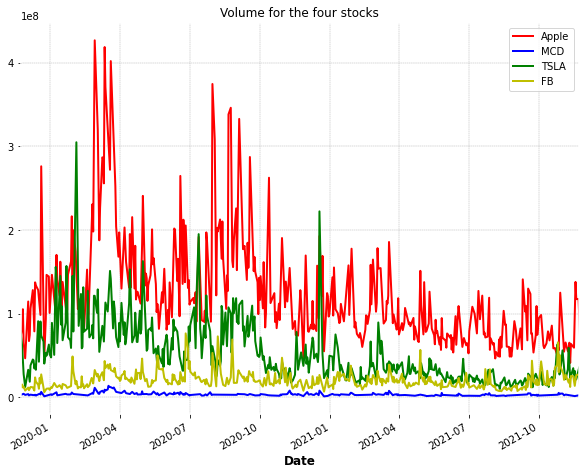

In [38]:
#Analysis for the sales Volumes for four stocks
fig = plt.figure(figsize=(10,8))

AAPL["Volume"].plot(xlim=['2019-11-23','2021-11-22'],c='r',label="Apple")
MCD["Volume"].plot(xlim=['2019-11-23','2021-11-22'],label="MCD",c='b')
TSLA["Volume"].plot(xlim=['2019-11-23','2021-11-22'],label="TSLA",c='g')
FB["Volume"].plot(xlim=['2019-11-23','2021-11-22'],label="FB",c='y')

plt.legend()
plt.title("Volume for the four stocks")

<ipython-input-39-bd9812e3efeb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company["Variation"]=company["High"]-company["Low"]


Text(0.5, 1.0, 'Variation for the four stocks')

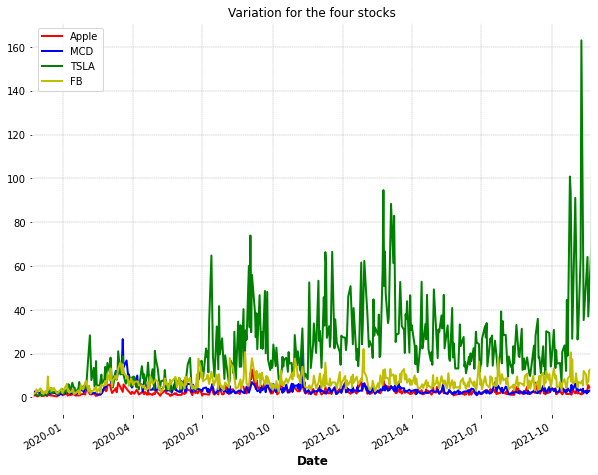

In [39]:
#Analysis for the daily variation of the four market stocks
#variation=high-low price
company_list=[AAPL,MCD,TSLA,FB]
company_list

for company in company_list:
    company["Variation"]=company["High"]-company["Low"]

fig = plt.figure(figsize=(10,8))
AAPL["Variation"].plot(xlim=['2019-11-23','2021-11-22'],c='r',ls='-',label="Apple")
MCD["Variation"].plot(xlim=['2019-11-23','2021-11-22'],label="MCD",c='b',ls='-')
TSLA["Variation"].plot(xlim=['2019-11-23','2021-11-22'],label="TSLA",c='g',ls='-')
FB["Variation"].plot(xlim=['2019-11-23','2021-11-22'],label="FB",c='y',ls='-')

plt.legend()
plt.title("Variation for the four stocks")

In [40]:
#Calculate the moving Average Price for 15,30 days moving average price for all four compan
company_list=[AAPL,MCD,TSLA,FB]
company_list

moving_average_days=[15,30]

for i in moving_average_days:
    for company in company_list:
        title="Moving for {} days".format(i)
        company[title]=company['Adj Close'].rolling(window=i).mean()

<ipython-input-40-d7e7d0bc0bd2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[title]=company['Adj Close'].rolling(window=i).mean()


In [41]:
# using the back fill to fill about the moving for 15 and 30 days value for Apple
AAPL=AAPL.fillna(method='bfill')
AAPL

#using the back fill to fill about the moving for 15 and 30 days value for MCD
MCD=MCD.fillna(method='bfill')
MCD

#using the back fill to fill about the moving for 15 and 30 days value for TSLA
TSLA=TSLA.fillna(method='bfill')
TSLA

#using the back fill to fill about the moving for 15 and 30 days value for FB
FB=FB.fillna(method='bfill')
FB

,Open,High,Low,Close,Adj Close,Volume,Variation,Moving for 15 days,Moving for 30 days
Date,,,,,,,,,
2019-11-22,198.380005,199.300003,197.619995,198.820007,198.820007,9959800,1.680008,199.612667,202.877333
2019-11-25,199.520004,200.970001,199.250000,199.789993,199.789993,15272300,1.720001,199.612667,202.877333
2019-11-26,200.000000,200.149994,198.039993,198.970001,198.970001,11735500,2.110001,199.612667,202.877333
2019-11-27,199.899994,203.139999,199.419998,202.000000,202.000000,12736600,3.720001,199.612667,202.877333
2019-11-29,201.600006,203.800003,201.210007,201.639999,201.639999,7985200,2.589996,199.612667,202.877333
...,...,...,...,...,...,...,...,...,...
2022-05-16,197.050003,205.369995,195.929993,200.039993,200.039993,27112600,9.440002,199.548000,205.699001
2022-05-17,202.119995,205.460007,198.360001,202.619995,202.619995,24872700,7.100006,200.992667,204.656667
2022-05-18,200.000000,201.000000,191.630005,192.240005,192.240005,23960000,9.369995,202.145334,203.336667


Text(0.5, 1.0, 'FB')

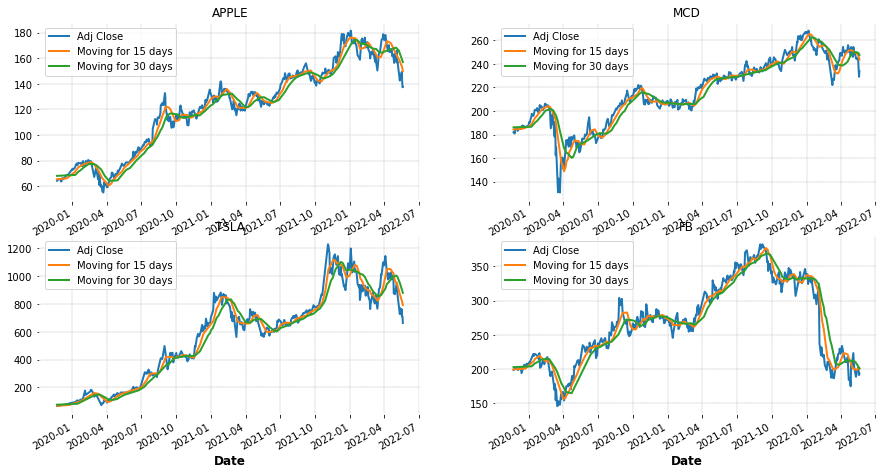

<Figure size 720x576 with 0 Axes>

In [43]:
#Plot the compariion graph for moving average price and adjusted closing price for the all four companies
company_names=["AAPL","MCD","TSLA","FB"]

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
fig = plt.figure(figsize=(10,8))

#For Apple Price Comparision
AAPL[['Adj Close', 'Moving for 15 days', 'Moving for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

#For MCD Price Comparision
MCD[['Adj Close', 'Moving for 15 days', 'Moving for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MCD')

#For TSLA Price Comparision
TSLA[['Adj Close', 'Moving for 15 days', 'Moving for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TSLA')

#For FB Price Comparision
FB[['Adj Close', 'Moving for 15 days', 'Moving for 30 days']].plot(ax=axes[1,1])
axes[1,1].set_title('FB')

Text(0.5, 1.0, 'Moving for 30 days Price for the four stocks')

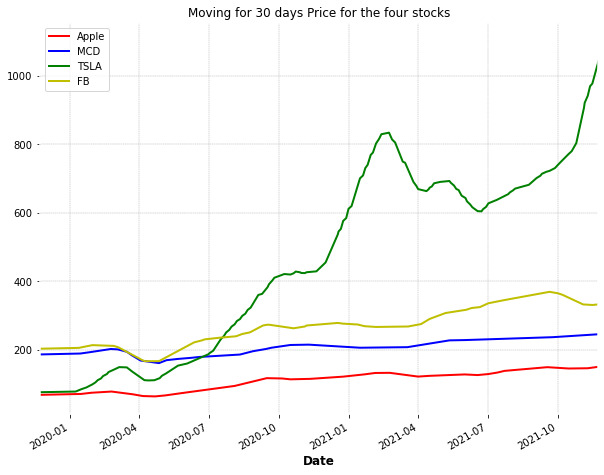

In [44]:
#draw the moving average for 30 days plots for all

plt.figure(figsize=(10, 8))
AAPL["Moving for 30 days"].plot(xlim=['2019-11-23','2021-11-22'],c='r',label="Apple")
MCD["Moving for 30 days"].plot(xlim=['2019-11-23','2021-11-22'],label="MCD",c='b')
TSLA["Moving for 30 days"].plot(xlim=['2019-11-23','2021-11-22'],label="TSLA",c='g')
FB["Moving for 30 days"].plot(xlim=['2019-11-23','2021-11-22'],label="FB",c='y')

plt.legend()
plt.title("Moving for 30 days Price for the four stocks")

Text(0.5, 1.0, 'Adjusted Closing Price for the four stocks')

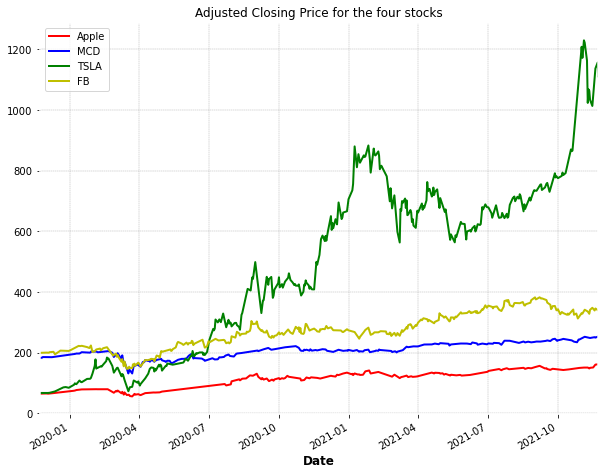

In [45]:
#draw the Adjusted Price plots for all

plt.figure(figsize=(10, 8))
AAPL["Adj Close"].plot(xlim=['2019-11-23','2021-11-22'],c='r',label="Apple")
MCD["Adj Close"].plot(xlim=['2019-11-23','2021-11-22'],label="MCD",c='b')
TSLA["Adj Close"].plot(xlim=['2019-11-23','2021-11-22'],label="TSLA",c='g')
FB["Adj Close"].plot(xlim=['2019-11-23','2021-11-22'],label="FB",c='y')

plt.legend()
plt.title("Adjusted Closing Price for the four stocks")

Text(0.5, 1.0, 'TSLA')

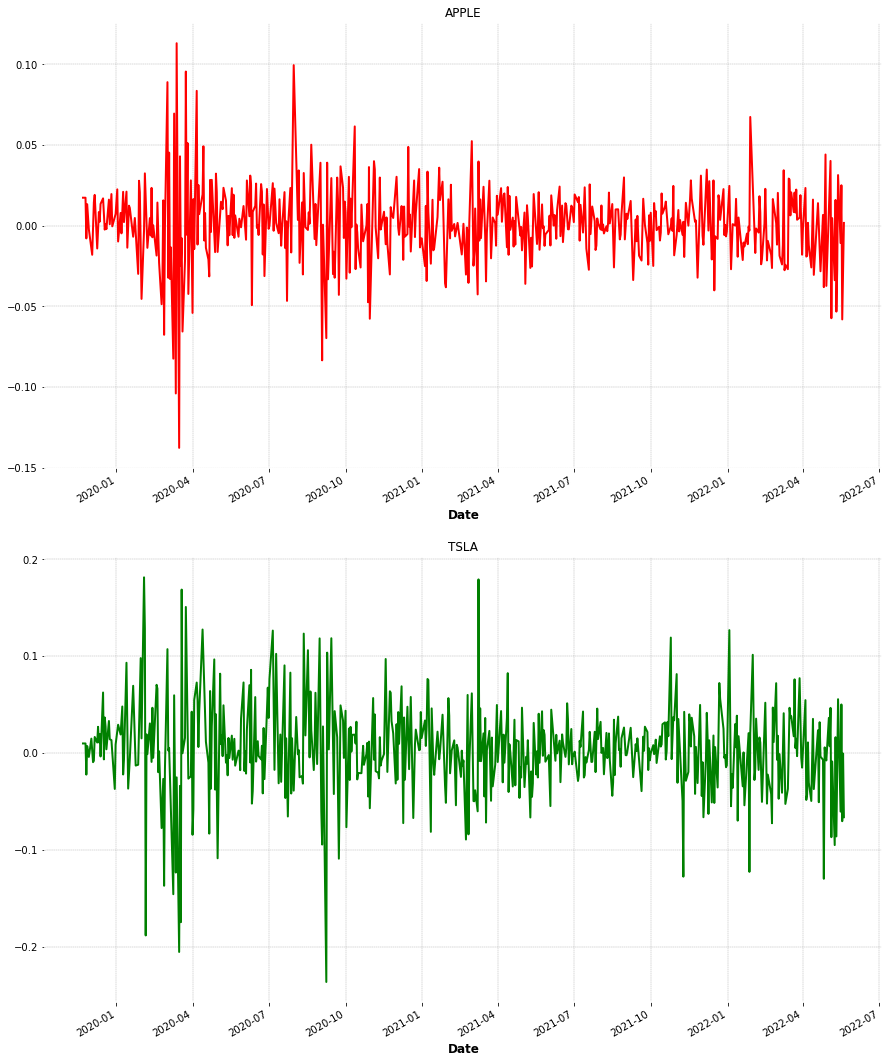

<Figure size 720x576 with 0 Axes>

In [46]:
#Four kinds of Log Returns
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(15)
fig = plt.figure(figsize=(10,8))

#Apple
AAPL["Log Daily Returns"]=np.log(AAPL["Adj Close"]/AAPL["Adj Close"].shift(1))
AAPL=AAPL.fillna(method="bfill")

#MCD
MCD["Log Daily Returns"]=np.log(MCD["Adj Close"]/MCD["Adj Close"].shift(1))
MCD=MCD.fillna(method="bfill")

##TSLA
TSLA["Log Daily Returns"]=np.log(TSLA["Adj Close"]/TSLA["Adj Close"].shift(1))
TSLA=TSLA.fillna(method="bfill")

##FB
FB["Log Daily Returns"]=np.log(FB["Adj Close"]/FB["Adj Close"].shift(1))
FB=FB.fillna(method="bfill")

#For Apple Price Comparision
AAPL['Log Daily Returns'].plot(ax=axes[0],c='r')
axes[0].set_title('APPLE')

#For TSLA Price Comparision
TSLA['Log Daily Returns'].plot(ax=axes[1],c='g')
axes[1].set_title('TSLA')

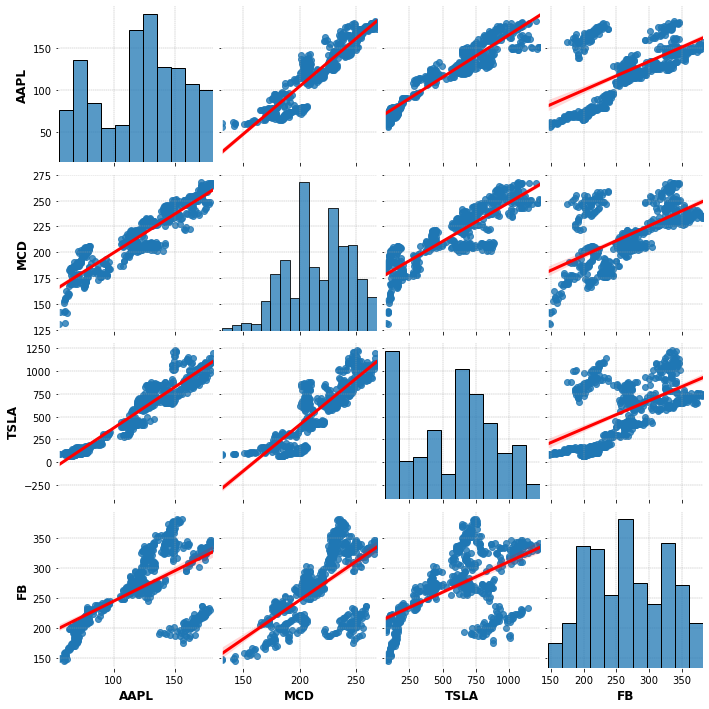

In [47]:
#concatenate the data and rename the column names
df_daily_returns=pd.concat([AAPL["Adj Close"],MCD["Adj Close"],TSLA["Adj Close"],FB["Adj Close"]],axis=1)
df_daily_returns.columns=["AAPL","MCD","TSLA","FB"]

#check the NA data and fill for the next on 
df_daily_returns.fillna(method="bfill")

#Plot the Graph
#daily returns
sns.pairplot(df_daily_returns,kind='reg',palette="husl",plot_kws={'line_kws':{'color':'red'}})

          AAPL       MCD      TSLA        FB
AAPL  1.000000  0.920962  0.952922  0.587122
MCD   0.920962  1.000000  0.873554  0.608835
TSLA  0.952922  0.873554  1.000000  0.560084
FB    0.587122  0.608835  0.560084  1.000000


<AxesSubplot:>

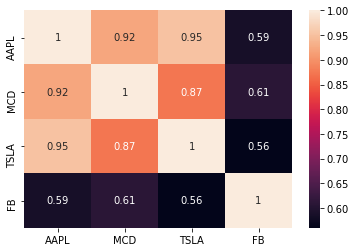

In [48]:
#Check for the correlations
df_daily_returns_correlation=df_daily_returns.corr()
print(df_daily_returns_correlation)

sns.heatmap(df_daily_returns_correlation, annot=True)

AAPL    0.001239
MCD     0.000389
TSLA    0.003677
FB     -0.000035
dtype: float64


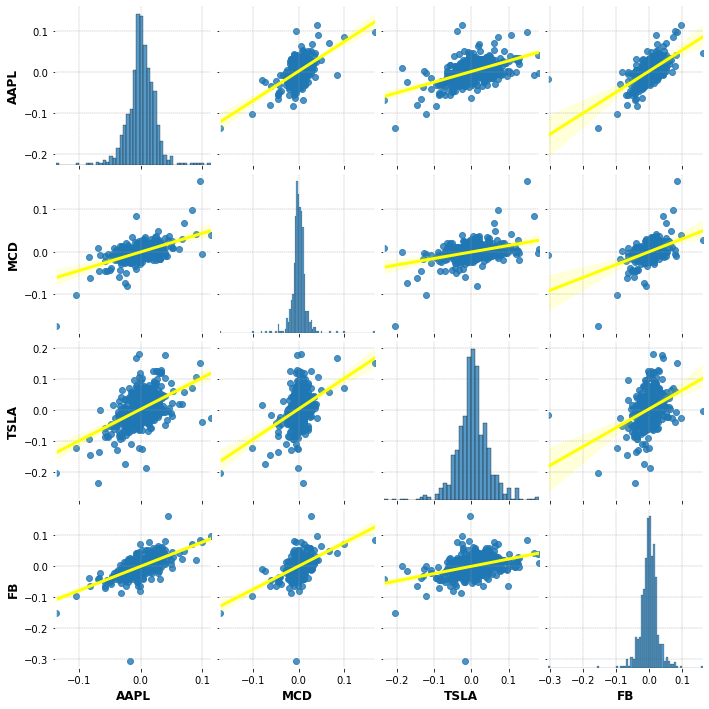

In [49]:
#Total Portfoli Log Returns Rate
total_log_daily_returns_Rate=np.log(df_daily_returns/df_daily_returns.shift(1)).fillna(method="bfill")
total_log_daily_returns_mean=total_log_daily_returns_Rate.mean()
print(total_log_daily_returns_mean)

#Plot the Pair Graph
sns.pairplot(total_log_daily_returns_Rate,kind='reg',plot_kws={'line_kws':{'color':'yellow'}})

          AAPL       MCD      TSLA        FB
AAPL  0.000529  0.000233  0.000543  0.000415
MCD   0.000233  0.000323  0.000319  0.000245
TSLA  0.000543  0.000319  0.002101  0.000494
FB    0.000415  0.000245  0.000494  0.000808
          AAPL       MCD      TSLA        FB
AAPL  1.000000  0.562340  0.514461  0.634563
MCD   0.562340  1.000000  0.386898  0.478493
TSLA  0.514461  0.386898  1.000000  0.378844
FB    0.634563  0.478493  0.378844  1.000000


<AxesSubplot:>

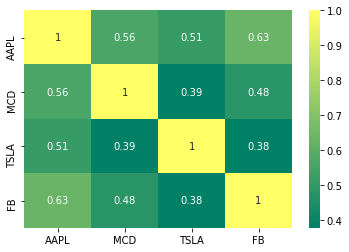

In [50]:
#Covariance
total_log_daily_returns_covariance=total_log_daily_returns_Rate.cov()
print(total_log_daily_returns_covariance)

#Correlations
total_log_daily_returns_Correlation=total_log_daily_returns_Rate.corr()
print(total_log_daily_returns_Correlation)

#daily log returns correlation
sns.heatmap(total_log_daily_returns_Correlation, annot=True, cmap='summer')

In [51]:
# define functions of good correlations to insepct the correlation
# to judge about the investment portfolid

def good_correlation(i):
    try:
        if i<0.3 and i>=0:
            print("It is little correlated")
    except Error:
        pass
    try:
        if i<=0.7 and i>=0.3:
            print("It is middle correlated")
    except Error:
        pass
    try:
        if i<1 and i>=0.7:
            print("It is highly correlated")
    except Error:
        pass
good_correlation(0.707384)

It is highly correlated


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

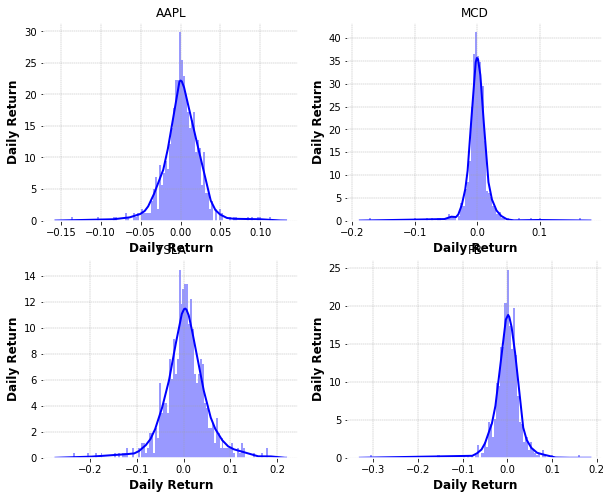

In [52]:
#Log returns displot graphs plot for the four companies
fig = plt.figure(figsize=(10,8))
company_names=["AAPL","MCD","TSLA","FB"]
company_names


for k,company_name in enumerate(company_names,1):
    plt.subplot(2, 2, k)
    sns.distplot(total_log_daily_returns_Rate[company_name],bins=100,color='blue')
    plt.ylabel('Daily Return')
    plt.title("{}".format(company_name))
    plt.xlabel('Daily Return')

In [53]:
#for the investment
def allocation_of_investment(appl,mcd,tsla,fb):
    investment_return_1=sum(total_log_daily_returns_mean*(appl+mcd+tsla+fb))*252
    print(investment_return_1)
    
#25% for each stocks
allocation_of_investment(0.25,0.25,0.25,0.25)

#70% on TSLA based on the log return rates
allocation_of_investment(0.1,0.1,0.7,0.1)

# define good investment
# to judge about the investment 

def good_investment_weight(j):
    try:
        if j>0.7:
            print("It is good investment")
    except Error:
        pass

1.3279351461574964
1.3279351461574964


In [54]:
#K chart for the foour companies
#company_names=["AAPL","MCD","TSLA","FB"]
#numbers=[0,1,2,3]
#company_list=[AAPL,MCD,TSLA,FB]


#for k,company in enumerate(company_list,1):
        #my_color = mpf.make_marketcolors(volume='inherit',edge='inherit',wick='inherit')
        #my_style = mpf.make_mpf_style(marketcolors=my_color,figcolor='(0.82, 0.83, 0.85)',gridcolor='(0.82, 0.83, 0.85)')
        #mpf.plot(company,type='candle',mav=(15,30),volume=True,style = 'charles',title="{}".format(company_name))

C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


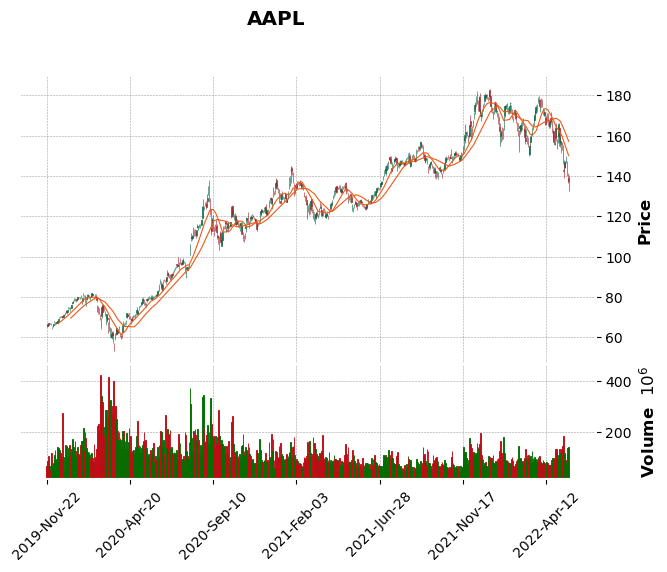

In [55]:
#For the Main Graph for Apple
mpf.plot(AAPL,type='candle',mav=(15,30),volume=True,style = 'charles',title="AAPL")

C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


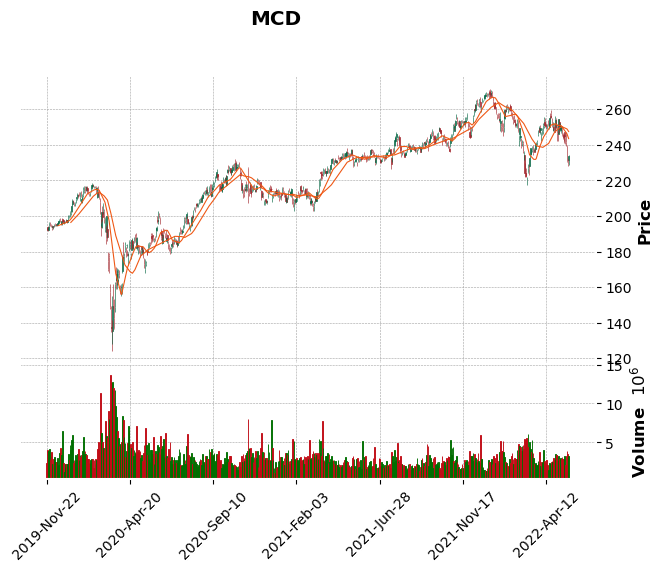

In [56]:
mpf.plot(MCD,type='candle',mav=(15,30),volume=True,style = 'charles',title="MCD")

C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


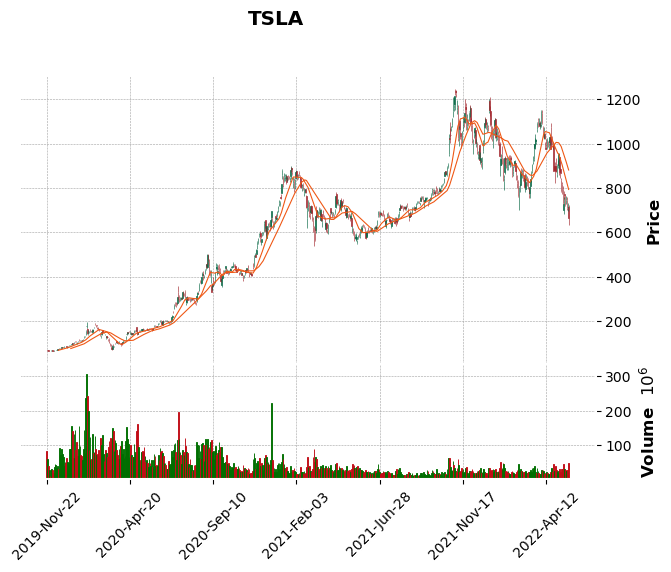

In [57]:
mpf.plot(TSLA,type='candle',mav=(15,30),volume=True,style = 'charles',title="TSLA")

C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


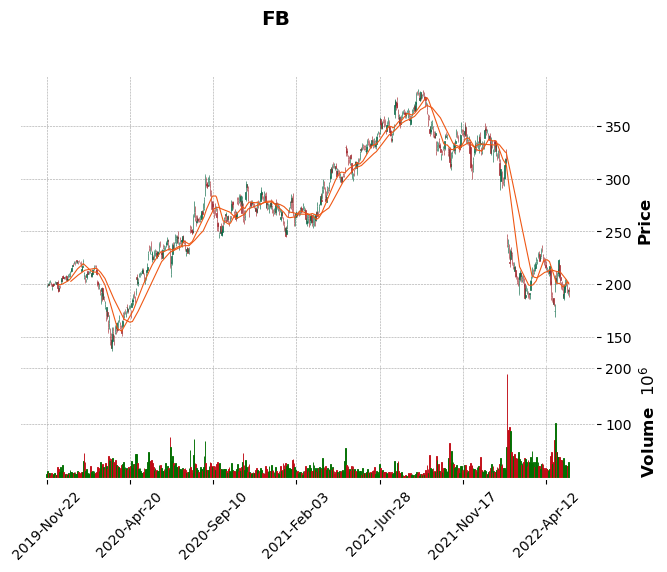

In [58]:
mpf.plot(FB,type='candle',mav=(15,30),volume=True,style = 'charles',title="FB")

Text(0.5, 1.0, 'AAPL Talib Figure Grpahs')

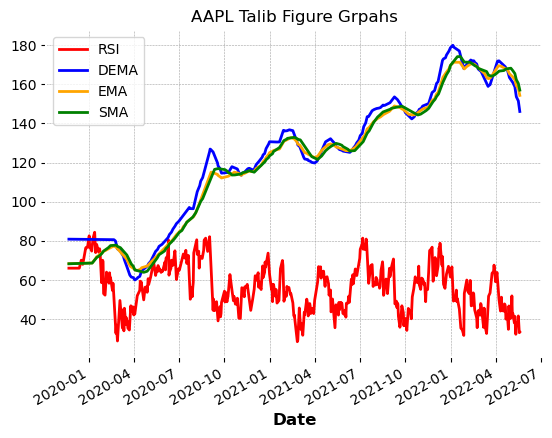

In [59]:
#talib figue for Apple
#RSI Relative Strength Index
AAPL["RSI"]=talib.RSI(AAPL["Adj Close"]).fillna(method="bfill")
AAPL["RSI"].plot(c='r')

#DMEA Double Exponential Moving Average
AAPL["DEMA"]=talib.DEMA(AAPL["Adj Close"]).fillna(method="bfill")
AAPL["DEMA"].plot(c='b')

#EMA Exponential Moving Average
AAPL["EMA"]=talib.EMA(AAPL["Adj Close"]).fillna(method="bfill")
AAPL["EMA"].plot(c='orange')

#SMA Simple Moving Average
AAPL["SMA"]=talib.SMA(AAPL["Adj Close"]).fillna(method="bfill")
AAPL["SMA"].plot(c='green')

plt.legend()
plt.title("AAPL Talib Figure Grpahs")

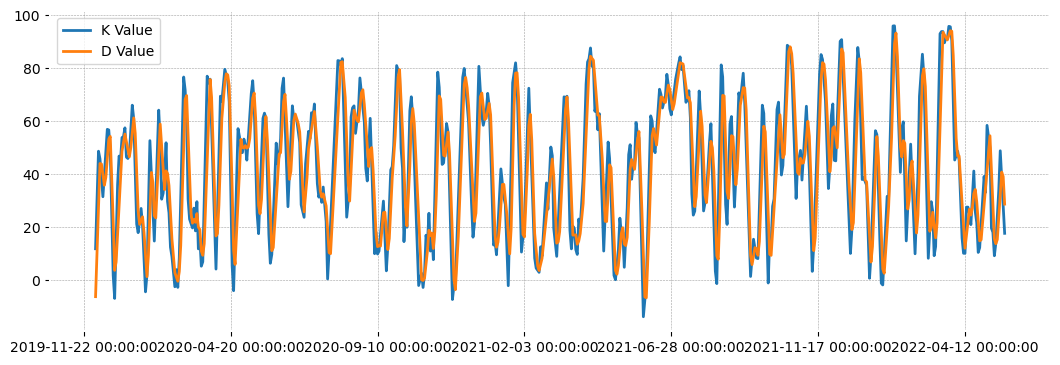

In [60]:
#Apple K,D Value
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0.3,1,0.4])
K_Value,D_Value = talib.STOCH(high = np.array(AAPL['High']), 
                low = np.array(AAPL['Low']), 
                close = np.array(AAPL['Adj Close']))
ax.plot(K_Value, label='K Value')
ax.plot(D_Value, label='D Value')
ax.set_xticks(range(0, len(AAPL.index.strftime('%Y-%m-%d')), 100))
ax.set_xticklabels(AAPL.index[::100])
plt.legend()

In [94]:
newdf=df['AAPL']+df['FB']+df['MCD']

In [95]:
X = newdf.drop(['Adj Close'],axis=1)
y = newdf['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

# model training

lm = LinearRegression()
lm.fit(X_train,y_train)

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Open,-8.568081e-03
High,1.540698e-01
Low,-1.273394e-01
Close,1.000618e+00
Volume,-6.393369e-09


Text(0, 0.5, 'Predicted Y')

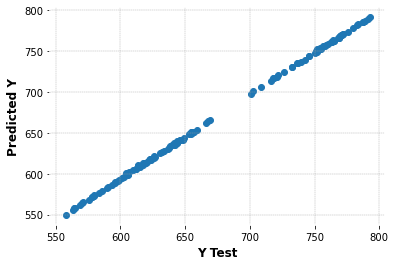

In [96]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


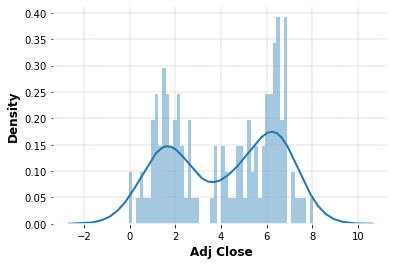

In [97]:
sns.distplot((y_test-predictions),bins=50);

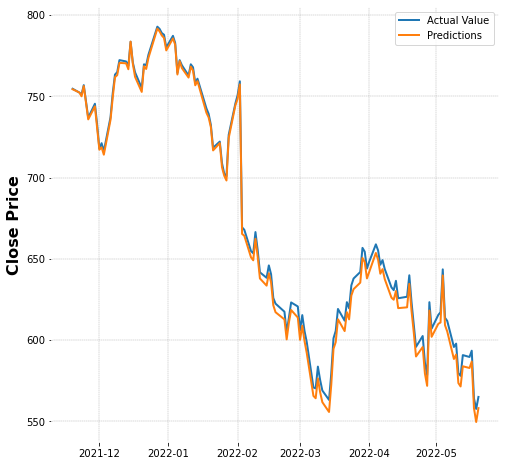

In [98]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':predictions})

plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [99]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.107282370661754
MSE: 22.10050282458731
RMSE: 4.701117188986816


In [100]:
#Write Csv File
AAPL.to_csv('Apple.csv')
MCD.to_csv('MCD.csv')
TSLA.to_csv('TSLA.csv')
FB.to_csv('FB.csv')
df_daily_returns.to_csv('df_daily_returns.csv')